#### Assigned Ligands

1. 4 methoxy phenol;monodentate;4;4;6
2. 4-fluoro-2-nitrophenol;monodentate;4;4;0
3. 2-amino-4-(trifluoromethyl)benzenethiolhydrochloride;bidentate;3;6;2,9
4. triphenylmethane thiol;monodentate;4;4;0
5. aniline;monodentate;4;4;0
6. 2 amino benzethiol;bidentate;3;6;0,7
7. o-phenylene diamine;bidentate;3;6;0,7
8. 2-bromoethylamine hydrobromide;monodentate;6;6;2
9. 3 methoxypropylamine;monodentate;6;6;1,5
10. ethanolamine;bidentate;3;6;0,3
11. pyridine;monodentate;6;6;3
12. 2,6 diphenyl pyridine;monodentate;2;2;11
13. 2,6-difluoropyridine;monodentate;6;6;7
14. piperidine;monodentate;6;6;3
15. 4-hydroxy-2,2,6,6-tetramethylpiperidine;monodentate;6;6;10
16. Ethyl piperidine-3-carboxylate;monodentate;6;6;9
17. 2,2-Bipyridyl;bidentate;3;6;4,11
18. 1,10-phenanthroline, anhyd;bidentate;3;6;2,12
19. 2-mercaptopyridine;bidentate;3;6;0,2

In [2]:
import pandas as pd
df = pd.read_excel('dataset.xlsx')
df[['Ligand Name','SMILES', 'Ni conc [mM]', 'Sample ID', 'max h2 (umol)']]

,Ligand Name,SMILES,Ni conc [mM],Sample ID,max h2 (umol)
0,"1,2-Benzenedithiol",[S-]c1ccccc1[S-],0.025,L10,0.281460
1,triphenylphosphine,c1ccc(cc1)P(c2ccccc2)c3ccccc3,0.025,L11,0.058493
2,"1,2-bis(dicyclohexylphosphino)ethane",C1CCC(CC1)P(CCP(C2CCCCC2)C3CCCCC3)C4CCCCC4,0.025,L12,0.390512
3,2-Mercaptonicotinic acid,[O-]C(=O)c1cccnc1[S-],0.025,L2,4.068596
4,3-Aminopyridine-2(1H)-thione,C1=CNC(=S)C(=C1)N,0.025,L3,9.021096
...,...,...,...,...,...
499,"4,5-dichloro-o-phenylenediamine",Nc1cc(Cl)c(Cl)cc1N,0.700,L53,0.157703
500,"N,N'-diphenyl-p-phenylenediamine",N(c1ccccc1)c2ccc(Nc3ccccc3)cc2,0.700,L54,0.011934
501,3-mercaptopropionic acid,OC(=O)CCS,0.700,L55,11.290852
502,"3,3,3 triphenyl propionic acid",OC(=O)CC(c1ccccc1)(c2ccccc2)c3ccccc3,0.700,L56,0.218561


In [3]:
from rdkit import RDLogger
RDLogger.DisableLog('rdApp.*') # Silence RDKit warnings
from rdkit import Chem
smiles = df['SMILES'].unique().tolist()
mols = [Chem.MolFromSmiles(s) for s in smiles]
mol_names = df['Ligand Name'].unique().tolist()
mol_dict = {mol_names[i]: smiles[i] for i in range(len(smiles))}
print(f'Number of unique ligands: {len(smiles)}')

Number of unique ligands: 56


In [4]:
sublist = df[['Ligand Name', 'SMILES']].drop_duplicates().reset_index(drop=True)[18:36]

# Find the row for 2-mercaptopyridine
row = df[df['Ligand Name'] == '2-mercaptopyridine'][['Ligand Name', 'SMILES']].drop_duplicates()

# Append to sublist
sublist = pd.concat([sublist, row], ignore_index=True)
sublist.to_numpy()

array([['4 methoxy phenol', 'COc1ccc(O)cc1'],
       ['4-fluoro-2-nitrophenol', 'Oc1ccc(F)cc1[N+]([O-])=O'],
       ['2-amino-4-(trifluoromethyl)benzenethiolhydrochloride',
        '[H+].[Cl-].Nc1cc(ccc1S)C(F)(F)F'],
       ['triphenylmethane thiol', 'SC(c1ccccc1)(c2ccccc2)c3ccccc3'],
       ['aniline', 'Nc1ccccc1'],
       ['2 amino benzethiol', 'Nc1ccccc1S'],
       ['o-phenylene diamine', 'Nc1ccccc1N'],
       ['2-bromoethylamine hydrobromide', '[H+].[Br-].NCCBr'],
       ['3 methoxypropylamine', 'COCCCN'],
       ['ethanolamine', 'NCCO'],
       ['pyridine', 'c1ccncc1'],
       ['2,6 diphenyl pyridine ', 'c1ccc(cc1)c2cccc(n2)c3ccccc3'],
       ['2,6-difluoropyridine', 'Fc1cccc(F)n1'],
       ['piperidine', 'C1CCNCC1'],
       ['4-hydroxy-2,2,6,6-tetramethylpiperidine',
        'CC1(C)CC(O)CC(C)(C)N1'],
       ['Ethyl piperidine-3-carboxylate', 'CCOC(=O)C1CCCNC1'],
       ['2,2′-Bipyridyl', 'c1ccc(nc1)c2ccccn2'],
       ['1,10-phenanthroline, anhyd', 'c1cnc2c(c1)ccc3cccnc23'],
     

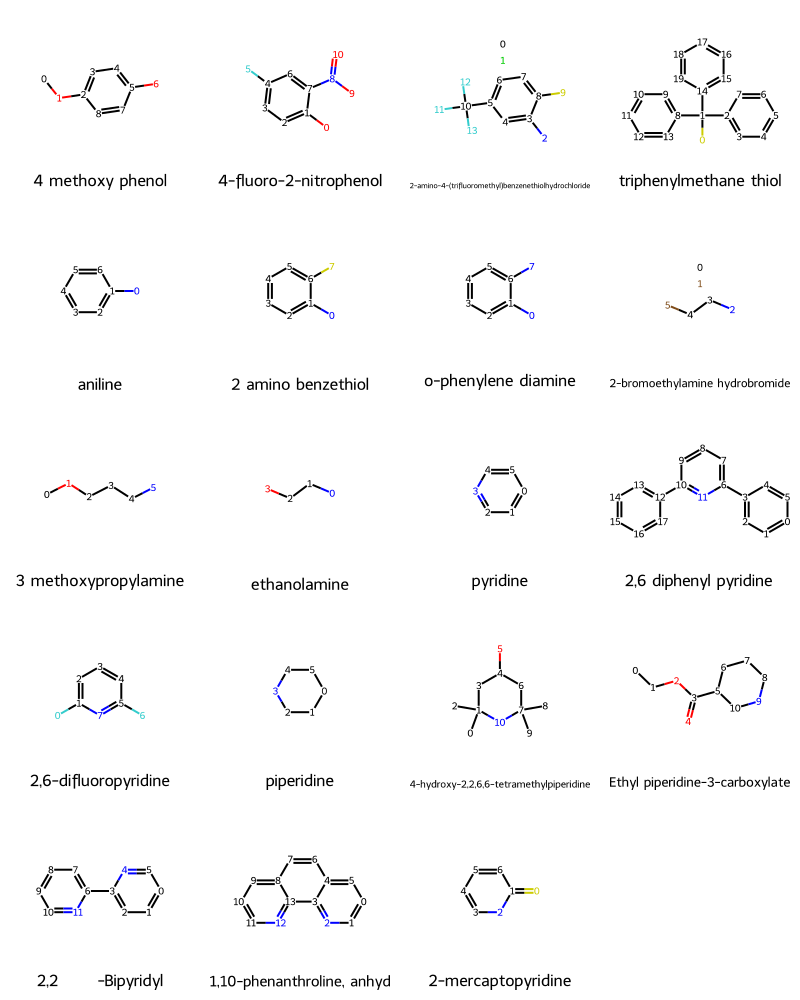

In [5]:
from rdkit.Chem import Draw

# Get SMILES and names from sublist
sub_smiles = sublist['SMILES'].tolist()
sub_names = sublist['Ligand Name'].tolist()
sub_mols = [Chem.MolFromSmiles(s) for s in sub_smiles]

# Draw with atom numbers
def mol_with_atom_numbers(mol):
    mol = Chem.Mol(mol)  # copy
    for atom in mol.GetAtoms():
        atom.SetProp('atomLabel', str(atom.GetIdx()))
    return mol

sub_mols_annotated = [mol_with_atom_numbers(m) for m in sub_mols]

Draw.MolsToGridImage(sub_mols_annotated, molsPerRow=4, legends=sub_names, useSVG=True)

#### Helper function for visualizaiton

In [6]:
from IPython.display import Image, display
from ase.io import read, write
from ase.visualize import view
import glob
import os

def get_structure_by_ligand(ligand_name, runs_dir='Runs'):
    """Find XYZ file matching a specific ligand name"""
    # Search for files containing the ligand name
    pattern = f'{runs_dir}/**/*{ligand_name}*/*.xyz'
    xyz_files = glob.glob(pattern, recursive=True)
    
    if not xyz_files:
        raise FileNotFoundError(f"No structure found for ligand: {ligand_name}")
    
    # Return the first match (or most recent if multiple)
    xyz_files = max(xyz_files, key=os.path.getmtime)
    atoms = read(xyz_files)
    write(f'complexes/{ligand_name}_structure.png', atoms, rotation='45x,45y,0z')
    display(Image(f'complexes/{ligand_name}_structure.png'))
    return atoms

1. 4methoxyphenol

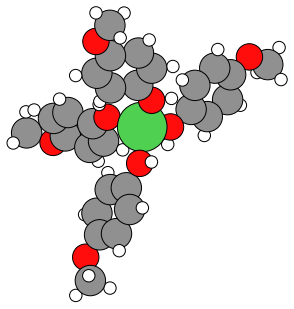

In [9]:
atoms = get_structure_by_ligand('4methoxyphenol')
view(atoms, viewer='x3d')

2. 4fluoro2nitrophenol

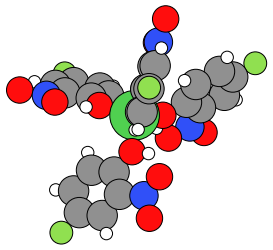

In [10]:
atoms = get_structure_by_ligand('4fluoro2nitrophenol')

3. 2-amino-4-(trifluoromethyl)benzenethiolhydrochloride

- This does not appear to be completing

In [ ]:
atoms = get_structure_by_ligand('2amino4trifluoromethylbenzenethiolhydrochloride')

FileNotFoundError: No structure found for ligand: 2amino4trifluorothiolhydrochloride

4. triphenylmethanethiol

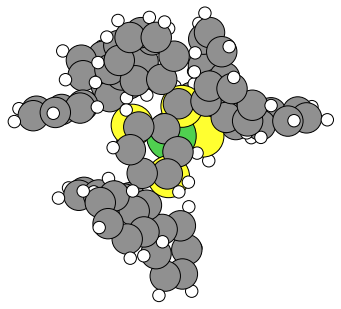

In [11]:
atoms = get_structure_by_ligand('triphenylmethanethiol')


5. aniline

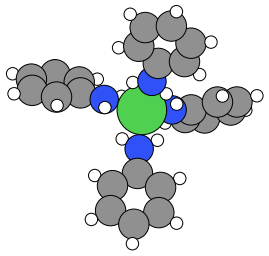

In [12]:
atoms = get_structure_by_ligand('aniline')

6. 2aminobenzethiol

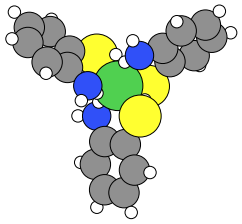

In [13]:
atoms = get_structure_by_ligand('2aminobenzethiol')

7. ophenylenediamine

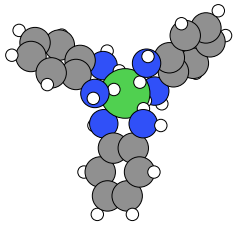

In [14]:
atoms = get_structure_by_ligand('ophenylenediamine')

8. 2bromoethylaminehydrobromide

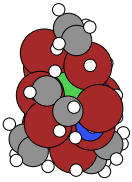

In [15]:
atoms = get_structure_by_ligand('2bromoethylaminehydrobromide')

9. 3methoxypropylamine

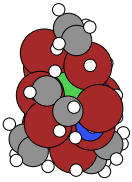

In [16]:
atoms = get_structure_by_ligand('2bromoethylaminehydrobromide')

10. ethanolamine

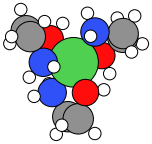

In [17]:
atoms = get_structure_by_ligand('ethanolamine')
view(atoms, viewer='x3d')

11. pyridine

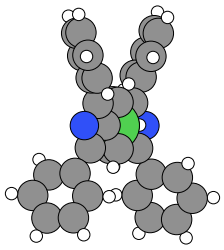

In [18]:
atoms = get_structure_by_ligand('pyridine')

12. 2_6diphenylpyridine

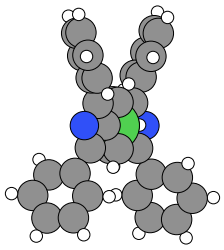

In [19]:
atoms = get_structure_by_ligand('2_6diphenylpyridine')

13. 2_6difluoropyridine

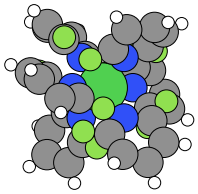

In [20]:
atoms = get_structure_by_ligand('2_6difluoropyridine')

14. piperidine

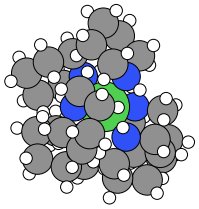

In [21]:
atoms = get_structure_by_ligand('piperidine')

15. 4hydroxy2_2_6_6tetramethylpiperidine

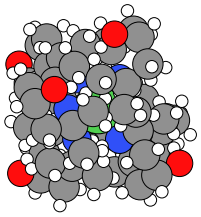

In [22]:
atoms = get_structure_by_ligand('4hydroxy2_2_6_6tetramethylpiperidine')
view(atoms, viewer='x3d')

16. ethylpiperidine3carboxylate

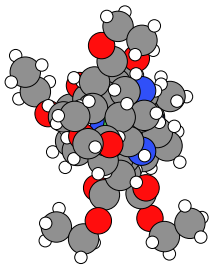

In [23]:
atoms = get_structure_by_ligand('ethylpiperidine3carboxylate')

17. 2_2bipyridyl

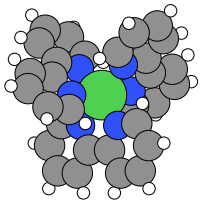

In [24]:
atoms = get_structure_by_ligand('2_2bipyridyl')

18. 1_10phenanthroline_anhyd

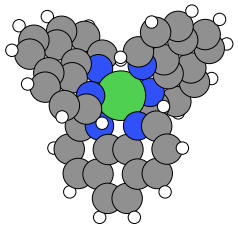

In [26]:
atoms = get_structure_by_ligand('1_10phenanthroline_anhyd')
view(atoms, viewer='x3d')

19. 2mercaptopyridine

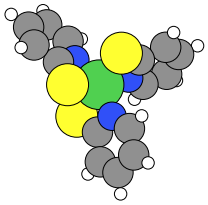

In [27]:
atoms = get_structure_by_ligand('2mercaptopyridine')